<a href="https://colab.research.google.com/github/majorquev/DBDC_202309_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C5/00_Ejemplos_adicionales_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplos adicionales ggplot2

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

In [1]:
install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(dplyr)
library(nycflights13)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## `stat_bin()`: Permite generar bines en la data y visualizar etiquetas entre otros elementos

1.- Creamos un histograma con 10 bins, y visualizaremos los conteos en etiquetas sobre cada barra del histograma. Para ello considerar a función `stat_bin` con parámetros `geom = 'label'`, y `mapping = aes(label=after_stat(count))`.

In [3]:
# Histograma de densidades
set.seed(15)
data <- data.frame(x = rnorm(1000))

head(data)




,x
,<dbl>
1,0.2588229
2,1.8311207
3,-0.3396186
4,0.8971982
5,0.4880163
6,-1.2553858


2.- Misma Visualización pero con histograma de frecuencias relativas.

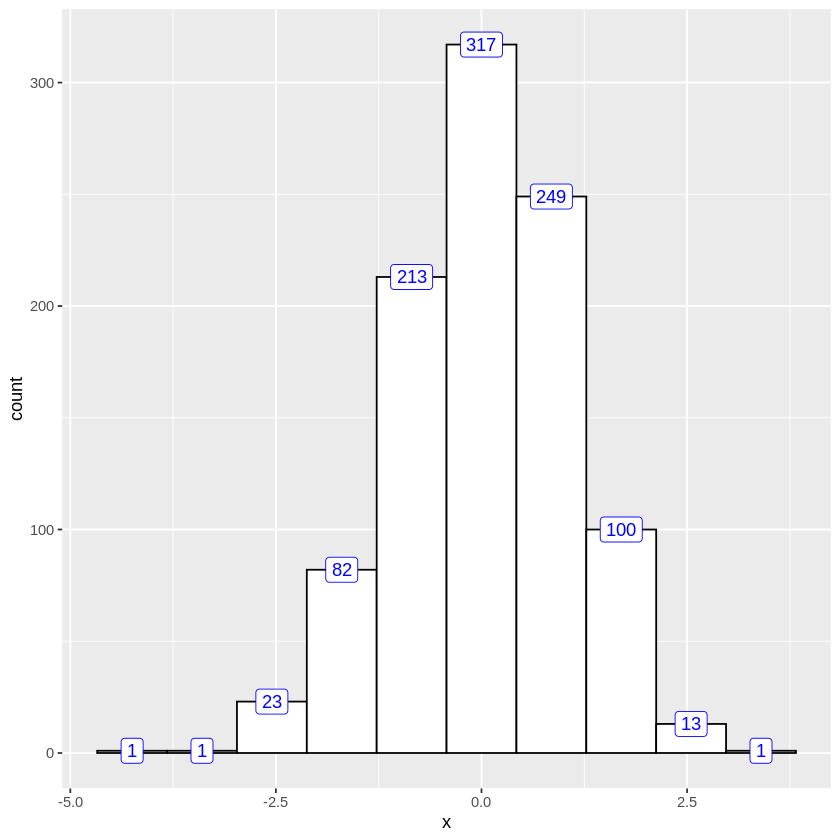

In [16]:
data %>%
  ggplot() +
  aes(x = x) +
  geom_histogram(
    bins = 10,
    color = "black",
    fill = "white"
  ) +
  stat_bin(
    bins = 10,
    geom = "label",
    color = "blue",
    mapping = aes(label = after_stat(count)),
    position =  position_stack(vjust = 1)
  )

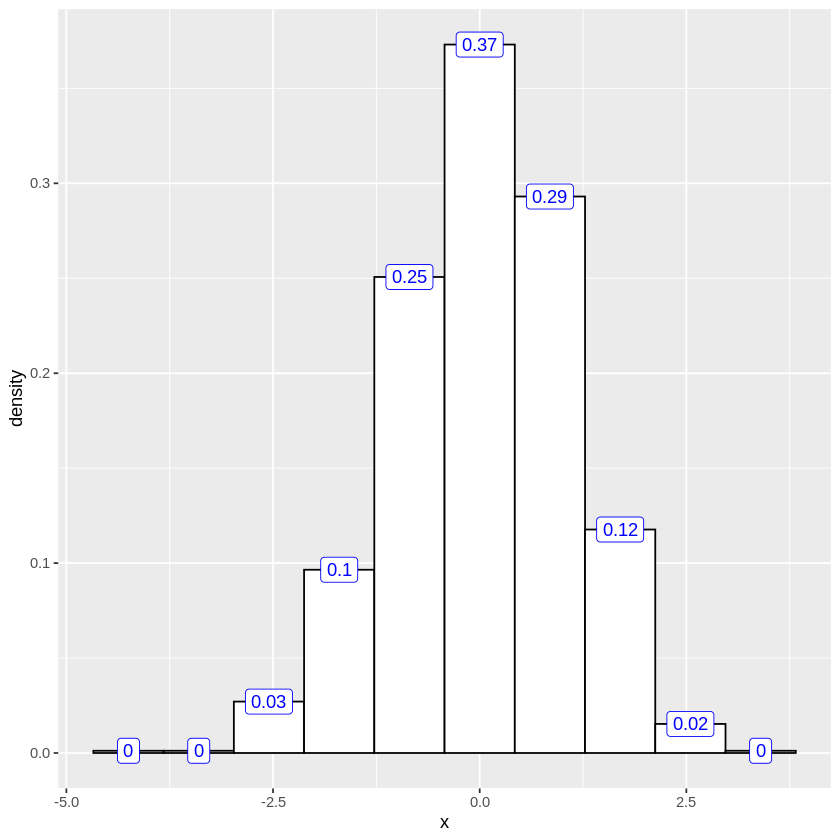

In [18]:
# Adicionalmente, si se quiere mostrar el histograma de densidades --------
#  es lo mismo pero se añade y = after_stat(density) en el maepo estético del histograma
data %>%
  ggplot() +
  aes(x=x, y = after_stat(density)) +
  geom_histogram(
    bins = 10,
    color = "black",
    fill = "white"
  ) +
  stat_bin(
    bins = 10,
    geom = "label",
    color = "blue",
    mapping = aes(label = after_stat(round(density,2))),
    position =  position_stack(vjust = 1)
  )

## `theme()`: Permite modificar diversos parámetros gráficos, en particualar la orientación de los ejes.

En este ejemplo consideraremos la data de vuelos, para o cual buscaremos visualizar la serie que contiene el total de vuelos por cada día.
Adicionalmente modificaremos la orientación de las etiquetas del eje X mediante la función `theme()`.

In [23]:
as.Date("2023-1-25")

[1] "2023-01-25"

In [19]:
?theme()

In [ ]:
data(flights)
head(flights)

In [ ]:
#flights %>%
#  mutate(fecha = as.Date(paste(year,month,day, sep = "-"))) %>%
#  count(fecha)

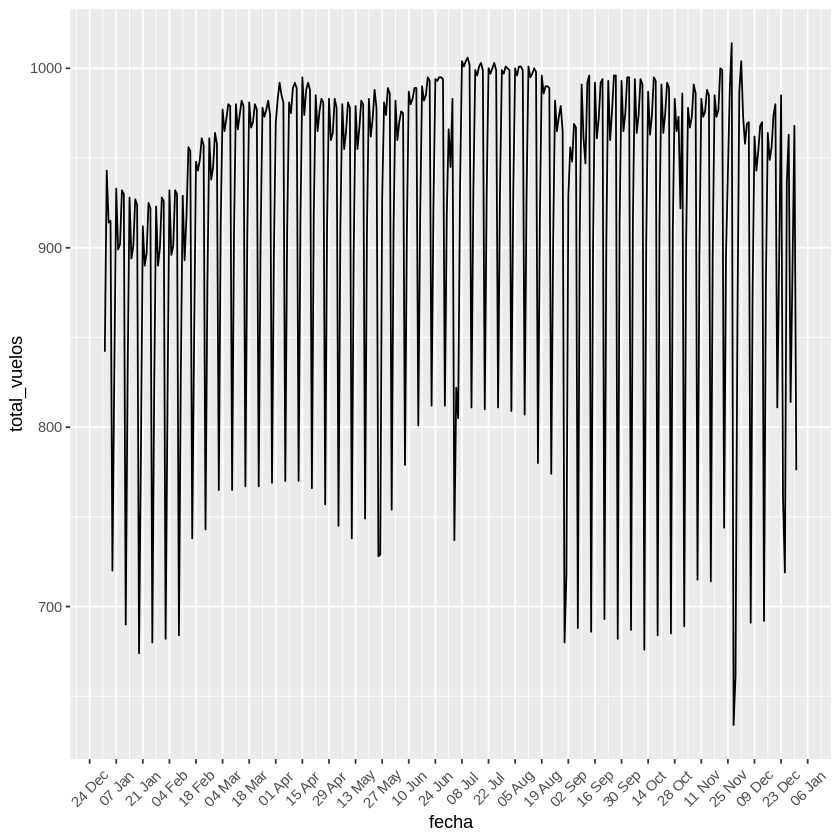

In [31]:

# Orientación etiquetas ejes ----------------------------------------------

# A modo de ejemplo podemos visulizar el total de vuelos por día, a través de un gráfico de líneas.
flights %>%
  mutate(fecha = as.Date(paste(year,month,day, sep = "-"))) %>%
  group_by(fecha) %>%
  summarise(total_vuelos = n()) %>%
  ggplot() +
  aes(x = fecha, y = total_vuelos) +
  geom_line() +
  scale_x_date( date_breaks = "2 weeks", date_labels = "%d %b") +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 0.5)
  )


# La función element_text() permite modificar orientación, y ajste vertical y hoizontal


## `geom_label()`: Al igual que `geom_text()`, permite añadir etiquetas en la visualización, sin la necesidad de generar manualmente los bins.

1.- Construir un gráfico de barras con el total de vuelos por cada carrier.
1.5.- Construir un gráfico de barras con el total de vuelos por cada carrie, pero apuntando a un df con los conteos ya calulados.

2.- Consideremos un gráfico de barras con las cantidades de cada barra ya calculadas. Para ello graficaremos los aeropuertos de *destino* de ranking 1, 10 y 20

3.- Para los aeropuertos identificados en el punto dos, construir un gráfico de barras _stackeado_ que muestre el total de vuelos por aeropuerto de origen.


In [ ]:
data(flights)

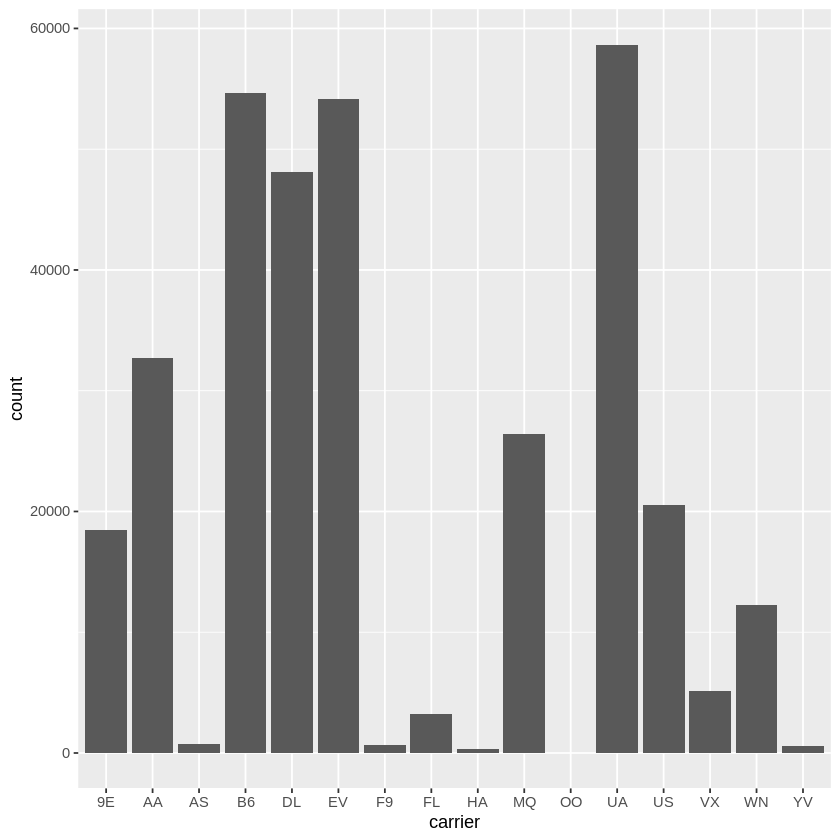

In [34]:
# 1.-
flights %>%
  ggplot() +
  aes(x = carrier) +
  geom_bar()

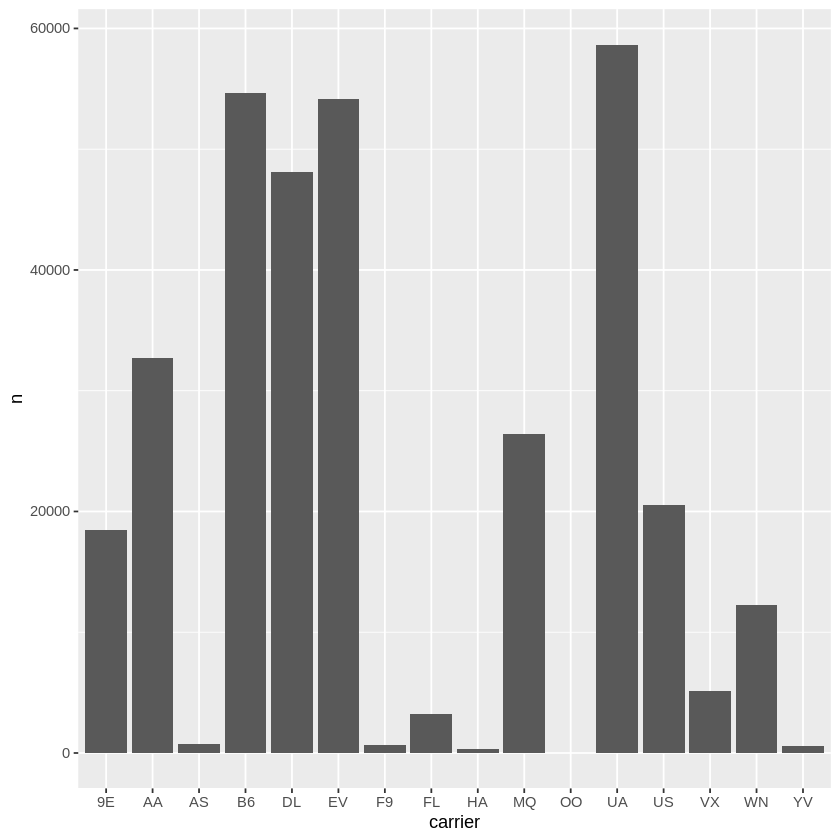

In [40]:
#1.5.-
flights %>%
  count(carrier) %>% # Recordar que esto genera una columna llamada "n" con el conteo
  ggplot() +
  aes(x = carrier, y = n) +
  geom_bar(
    stat = "identity"
  )

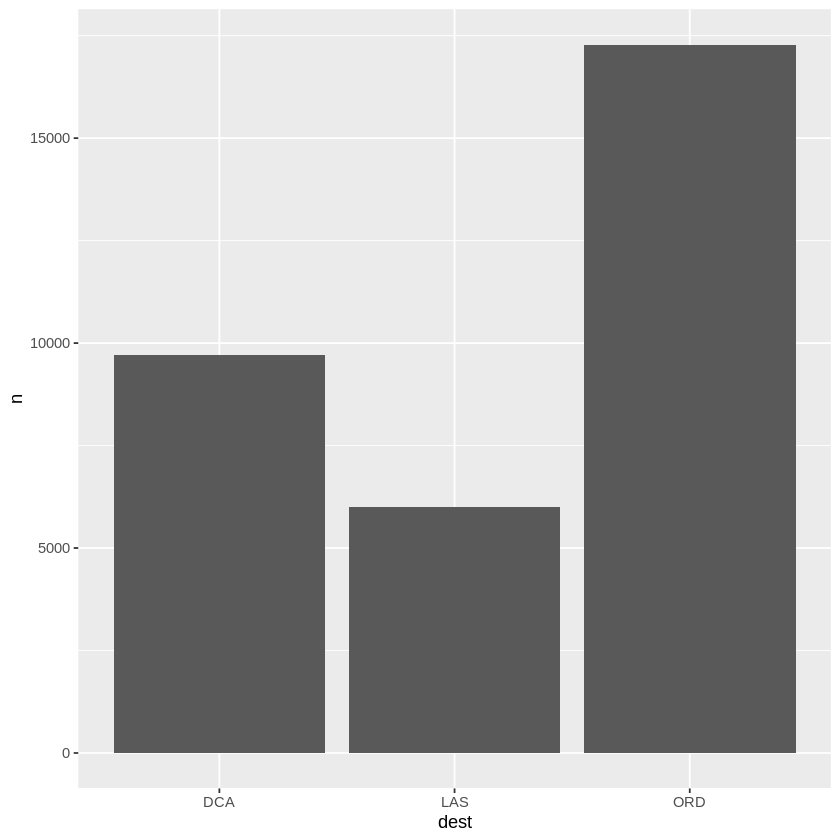

In [45]:
# Contamos con las capas geom_label y geom_text ---------------------------------
# Para ello graficaremos los aeropuertos de destino de ranking 1, 10 y 20

flights %>%
  count(dest) %>%
  arrange(desc(n)) %>%
  mutate(rk = row_number()) %>%
  filter(rk %in% c(1,10,20)) %>% ## filter(rk == 1 | rk == 10 | rk == 20)
  ggplot() +
  aes(x = dest, y = n) %>%
  geom_bar(stat = "identity")




In [54]:
?dense_rank

In [60]:
exam2 <- data.frame(
  x = c(1:5),
  y = c(7:11),
  z = c("A", "B", "A", "B", "C")
)
exam2

exam2 %>%
  group_by(z) %>%
  ungroup() %>%
  mutate(t_x = sum(x))

x,y,z
<int>,<int>,<chr>
1,7,A
2,8,B
3,9,A
4,10,B
5,11,C


x,y,z,t_x
<int>,<int>,<chr>,<int>
1,7,A,15
2,8,B,15
3,9,A,15
4,10,B,15
5,11,C,15


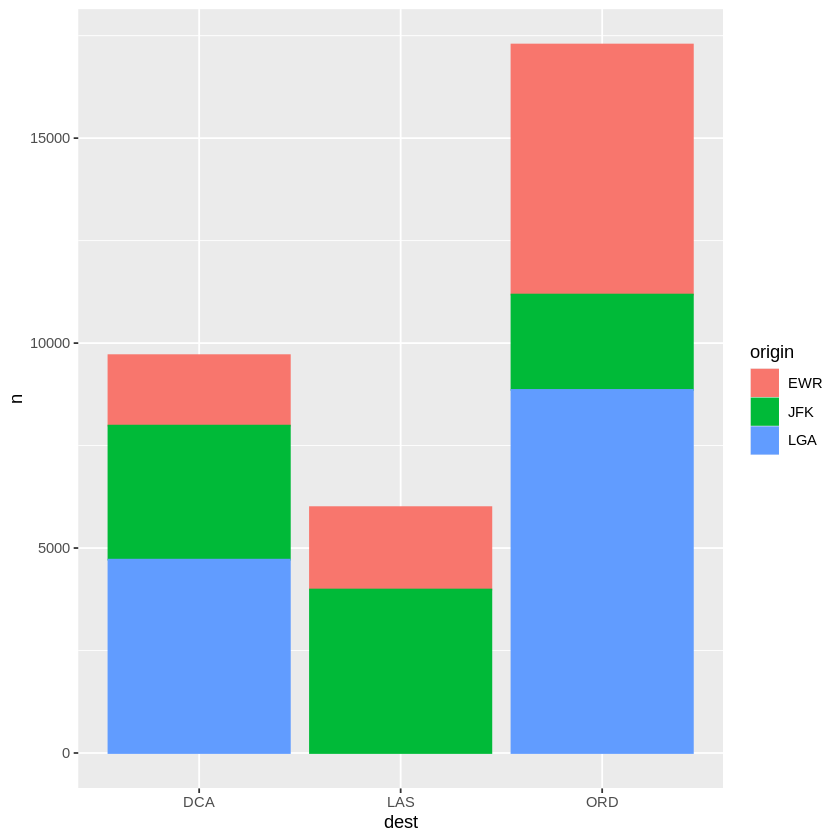

In [61]:
# 3.-
  flights %>%
    count(origin, dest) %>%
    group_by(dest) %>%
    mutate(tot_dest = sum(n)) %>%
    arrange(desc(tot_dest)) %>%
    ungroup() %>%  # Levantamos la restricción impuesta por group_by
    mutate(rk = dense_rank(desc(tot_dest) )) %>%
    filter(rk %in% c(1,10,20)) %>%
  ggplot() +
  aes(x = dest, y = n, color = origin, fill = origin) %>%
  geom_bar(stat = "identity") # por defecto genera un "stacked bar chart"

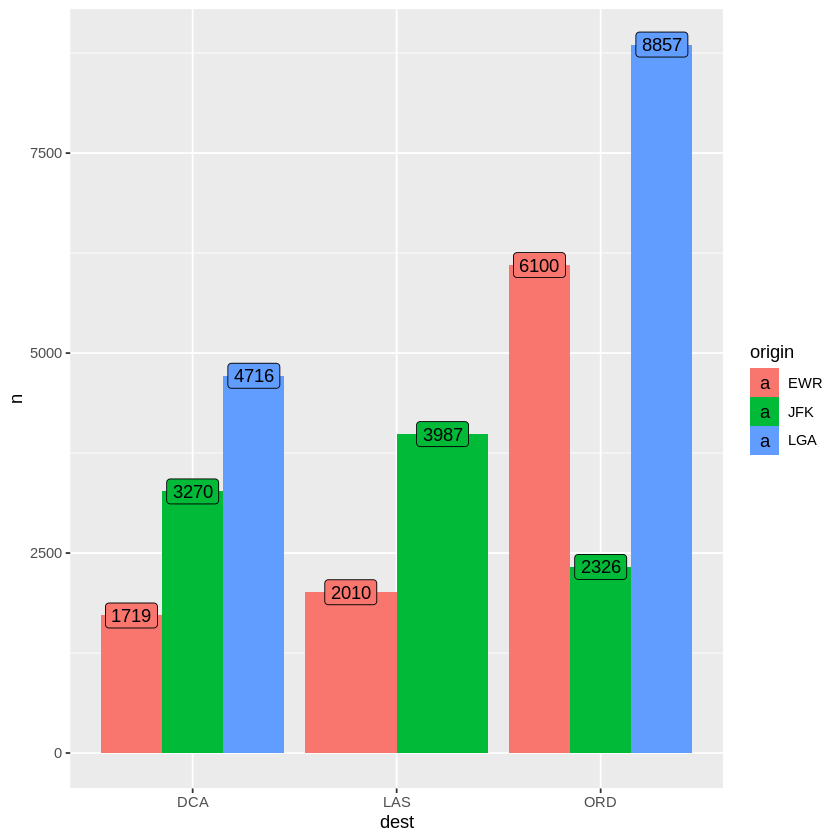

In [73]:
  flights %>%
    count(origin, dest) %>%
    group_by(dest) %>%
    mutate(tot_dest = sum(n)) %>%
    arrange(desc(tot_dest)) %>%
    ungroup() %>%  # Levantamos la restricción impuesta por group_by
    mutate(rk = dense_rank(desc(tot_dest) )) %>%
    filter(rk %in% c(1,10,20)) %>%
  ggplot() +
  aes(x = dest, y = n, color = origin, fill = origin, label = n) + # esto aprendimos
  geom_bar(stat = "identity",
           position = "dodge") +
  geom_label(aes(label = n), position = position_dodge(0.9), color = "black")